# Assignment 3_Amit Kumar

In [ ]:
#
import os
import numpy as np
import pandas as pd
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
#
from talib import RSI, BBANDS, MACD, ATR
#
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
import zipline
import datetime
import pytz
from zipline.data.bundles import load
#from trading_calendars import get_calendar
import pyfolio as pf
#
%load_ext zipline


### custom data bundle were created for AAPL stock 

In [ ]:

 
# get current directory
path = os.getcwd()
print("Current Directory", path)
 
# prints parent directory
print(os.path.abspath(os.path.join(path, os.pardir)))

In [170]:
# data = pd.read_csv('D:/data_aapl/daily/daily.csv',index_col=0)
# for col in data.columns:
#     data.rename(columns={col:col.lower()},inplace=True)
# data['date'] = pd.to_datetime(data['date'])
# cols = ['date', 'open', 'high', 'low', 'close', 'adj close',
#        'volume']
# data[cols].to_csv('D:/data_aapl/daily/daily.csv')

# data.head()

## 1. Strategy 1: Buy and hold for the period of investment

#### I  started with a basic strategy, that is, Buy and Hold. Here the idea was to buy AAPL stocks and no nothing for entire period of investement. This strategy was also created as bench mark for other advance strategy.

In [202]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o buy_and_hold.pkl 

# imports 2017-02-23
from zipline.api import order, symbol, record, set_benchmark

# parameters
selected_stock = 'daily'
n_stocks_to_buy = 100

def initialize(context):
    set_benchmark(symbol('daily'))
    context.asset = symbol('daily')
    context.has_ordered = False  

def handle_data(context, data):
    # record price for further inspection
    record(price=data.current(symbol(selected_stock), 'price'))
    
    # trading logic
    if not context.has_ordered:
        # placing order, negative number for sale/short
        order(symbol(selected_stock), n_stocks_to_buy)
        # setting up a flag for holding a position
        context.has_ordered = True

,period_open,period_close,portfolio_value,long_exposure,starting_cash,ending_cash,positions,pnl,net_leverage,gross_leverage,...,excess_return,max_leverage,sharpe,algo_volatility,algorithm_period_return,sortino,period_label,trading_days,treasury_period_return,max_drawdown
2017-02-23 21:00:00+00:00,2017-02-23 14:31:00+00:00,2017-02-23 21:00:00+00:00,250.00000,0.0,250.00000,250.00000,[],0.00000,0.000000,0.000000,...,0.0,0.000000,NaN,NaN,0.000000,NaN,2017-02,1,0.0,0.000000
2017-02-24 21:00:00+00:00,2017-02-24 14:31:00+00:00,2017-02-24 21:00:00+00:00,248.19175,3416.5,250.00000,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",-1.80825,13.765566,13.765566,...,0.0,13.765566,-11.224972,0.081190,-0.007233,-11.224972,2017-02,2,0.0,-0.007233
2017-02-27 21:00:00+00:00,2017-02-27 14:31:00+00:00,2017-02-27 21:00:00+00:00,254.89175,3423.2,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",6.70000,13.430015,13.430015,...,0.0,13.765566,5.796699,0.286375,0.019567,25.041349,2017-02,3,0.0,-0.007233
2017-02-28 21:00:00+00:00,2017-02-28 14:31:00+00:00,2017-02-28 21:00:00+00:00,256.49175,3424.8,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",1.60000,13.352476,13.352476,...,0.0,13.765566,7.015499,0.233837,0.025967,28.574807,2017-02,4,0.0,-0.007233
2017-03-01 21:00:00+00:00,2017-03-01 14:31:00+00:00,2017-03-01 21:00:00+00:00,326.39175,3494.7,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",69.90000,10.707072,10.707072,...,0.0,13.765566,7.922543,1.899335,0.305567,293.043790,2017-03,5,0.0,-0.007233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,1206.89175,4375.2,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",0.00000,3.625180,3.625180,...,0.0,13.765566,2.235581,1.103042,3.827567,3.885055,2017-12,212,0.0,-0.470858
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,1095.99175,4264.3,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",-110.90000,3.890814,3.890814,...,0.0,13.765566,2.120878,1.105980,3.383967,3.658948,2017-12,213,0.0,-0.470858
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,1096.69175,4265.0,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",0.70000,3.888969,3.888969,...,0.0,13.765566,2.116544,1.103421,3.386767,3.651565,2017-12,214,0.0,-0.470858
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,1108.69175,4277.0,-3168.30825,-3168.30825,"[{'sid': Equity(0 [DAILY]), 'amount': 100, 'co...",12.00000,3.857700,3.857700,...,0.0,13.765566,2.123287,1.100841,3.434767,3.663162,2017-12,215,0.0,-0.470858


## performance DataFrame

In [203]:
# read the performance summary dataframe
buy_and_hold_results = pd.read_pickle('buy_and_hold.pkl')

In [204]:
buy_and_hold_results.transactions.value_counts()

[]                                                                                                                                                                       215
[{'amount': 100, 'dt': 2017-02-24 21:00:00+00:00, 'price': 34.1820825, 'order_id': '9706f958553a4ec889d99ea1ee328720', 'sid': Equity(0 [DAILY]), 'commission': None}]      1
Name: transactions, dtype: int64

### visualization of  strategy 1 features

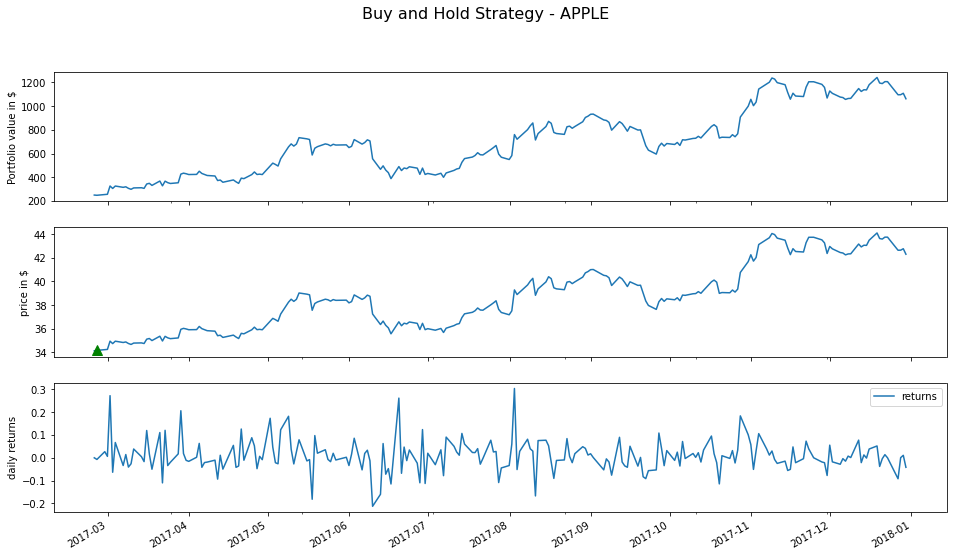

Final portfolio value (including cash): 1062.39$


In [221]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

# portfolio value
buy_and_hold_results.portfolio_value.plot(ax=ax[0])
ax[0].set_ylabel('Portfolio value in $')

# asset
buy_and_hold_results.price.plot(ax=ax[1])
ax[1].set_ylabel('price in $')

# mark transactions
perf_trans_1 = buy_and_hold_results.loc[[t != [] for t in buy_and_hold_results.transactions]]
buys = perf_trans_1.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans_1.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax[1].plot(buys.index, buy_and_hold_results.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
ax[1].plot(sells.index, buy_and_hold_results.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')

# daily returns
buy_and_hold_results.returns.plot(ax=ax[2])
ax[2].set_ylabel('daily returns')

fig.suptitle('Buy and Hold Strategy - APPLE', fontsize=16)
plt.legend()
plt.show()

print('Final portfolio value (including cash): {}$'.format(np.round(buy_and_hold_results.portfolio_value[-1], 2)))

In [222]:
pd.DataFrame.from_records([x[0] for x in buy_and_hold_results.transactions.values if x != []])

,amount,dt,price,order_id,sid,commission
0,100,2017-02-24 21:00:00+00:00,34.182082,9706f958553a4ec889d99ea1ee328720,Equity(0 [DAILY]),None


In [223]:
buy_and_hold_results.columns

Index(['period_open', 'period_close', 'portfolio_value', 'long_exposure',
       'starting_cash', 'ending_cash', 'positions', 'pnl', 'net_leverage',
       'gross_leverage', 'longs_count', 'short_exposure', 'transactions',
       'ending_exposure', 'shorts_count', 'returns', 'long_value', 'orders',
       'starting_value', 'short_value', 'capital_used', 'ending_value',
       'starting_exposure', 'price', 'alpha', 'beta',
       'benchmark_period_return', 'benchmark_volatility', 'excess_return',
       'max_leverage', 'sharpe', 'algo_volatility', 'algorithm_period_return',
       'sortino', 'period_label', 'trading_days', 'treasury_period_return',
       'max_drawdown'],
      dtype='object')

## pyfolio Analysis

In [220]:
import pyfolio as pf
import numpy as np

# Extract algo returns and benchmark returns
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2017-02-23
End date,2022-01-20
Total months,58
,Backtest
Annual return,12.8%
Cumulative returns,80.9%
Annual volatility,17.3%
Sharpe ratio,0.78
Calmar ratio,0.58
Stability,0.74
Max drawdown,-22.0%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

## Strategy 2: Simple Moving Average Strategy

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value en

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value en

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value en

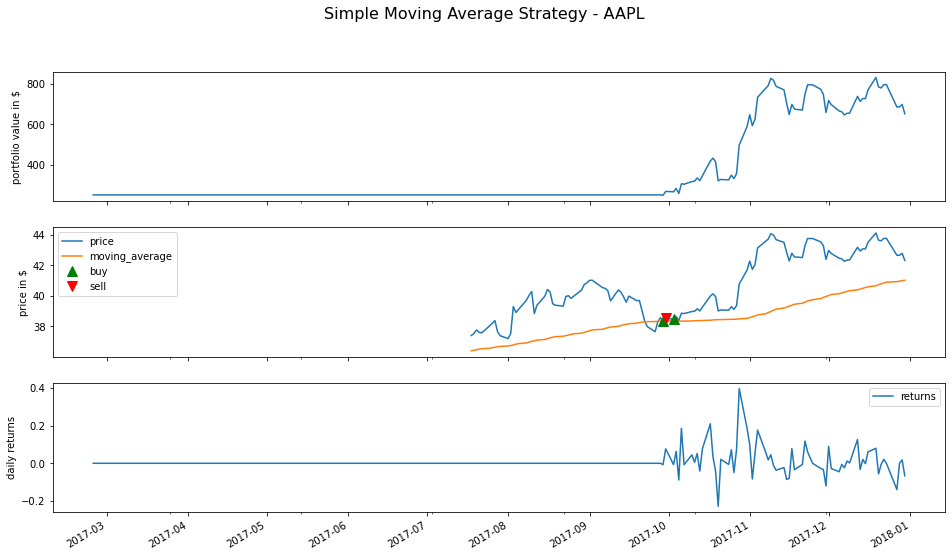

Final portfolio value (including cash): 650.73$


,period_open,period_close,returns,portfolio_value,short_value,longs_count,net_leverage,long_value,pnl,capital_used,...,alpha,beta,benchmark_period_return,benchmark_volatility,max_drawdown,trading_days,period_label,sortino,price,moving_average
2017-02-23 21:00:00+00:00,2017-02-23 14:31:00+00:00,2017-02-23 21:00:00+00:00,0.000000,250.0000,0.0,0,0.000000,0.0,0.0,0.0,...,NaN,NaN,-0.006202,NaN,0.000000,1,2017-02,NaN,NaN,NaN
2017-02-24 21:00:00+00:00,2017-02-24 14:31:00+00:00,2017-02-24 21:00:00+00:00,0.000000,250.0000,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,-0.005241,0.080467,0.000000,2,2017-02,NaN,NaN,NaN
2017-02-27 21:00:00+00:00,2017-02-27 14:31:00+00:00,2017-02-27 21:00:00+00:00,0.000000,250.0000,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,-0.003290,0.070699,0.000000,3,2017-02,NaN,NaN,NaN
2017-02-28 21:00:00+00:00,2017-02-28 14:31:00+00:00,2017-02-28 21:00:00+00:00,0.000000,250.0000,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,-0.002824,0.059037,0.000000,4,2017-02,NaN,NaN,NaN
2017-03-01 21:00:00+00:00,2017-03-01 14:31:00+00:00,2017-03-01 21:00:00+00:00,0.000000,250.0000,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.017528,0.158358,0.000000,5,2017-03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.000000,795.2349,0.0,1,5.501771,4375.2,0.0,0.0,...,1.684542,2.222904,0.273897,0.175023,-0.260053,212,2017-12,4.519914,43.752,40.87837
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-0.139456,684.3349,0.0,1,6.231306,4264.3,-110.9,0.0,...,1.366193,2.310189,0.241607,0.176981,-0.260053,213,2017-12,3.752234,42.643,40.91587
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.001023,685.0349,0.0,1,6.225960,4265.0,0.7,0.0,...,1.358425,2.310285,0.241811,0.176568,-0.260053,214,2017-12,3.746496,42.650,40.95139
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.017517,697.0349,0.0,1,6.135991,4277.0,12.0,0.0,...,1.379150,2.310785,0.245305,0.176165,-0.260053,215,2017-12,3.789702,42.770,40.98207


In [209]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o sma_strategy.pkl 
# imports 
from zipline.api import order_target, record, symbol, set_benchmark
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

# parameters 
ma_periods = 100
selected_stock = 'daily'
n_stocks_to_buy = 100

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < ma_periods:
        return

    # 3. access price history
    price_history_1 = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
 
    # 4. calculate moving averages
    ma = price_history_1.mean()
    # 5. trading logic
        # cross up
    if (price_history_1[-2] < ma) & (price_history_1[-1] > ma):
        order_target(context.asset, n_stocks_to_buy)
    # cross down
    elif (price_history_1[-2] > ma) & (price_history_1[-1] < ma):
        order_target(context.asset, 0)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           moving_average=ma)
    
    # 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'moving_average']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Simple Moving Average Strategy - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))

In [210]:
import pyfolio as pf
import numpy as np

# Extract algo returns and benchmark returns
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2017-02-23
End date,2022-01-20
Total months,58
,Backtest
Annual return,12.8%
Cumulative returns,80.9%
Annual volatility,17.3%
Sharpe ratio,0.78
Calmar ratio,0.58
Stability,0.74
Max drawdown,-22.0%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

## Strategy 3: RSI

In [216]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o rsi.pkl 
# imports 
from zipline.api import order_target, record, symbol, set_benchmark, order_percent
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np
from talib import RSI
import talib as ta


# parameters 
selected_stock = 'daily'
n_stocks_to_buy = 15
UPPER = 70
LOWER = 30
RSI_PERIOD = 14

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < RSI_PERIOD + 1:
        return
        
    price_history_3 = data.history(context.asset, fields="price", bar_count=RSI_PERIOD+1, frequency="1d")
    rsi = ta.RSI(price_history_3, timeperiod=RSI_PERIOD)
    
    if rsi[-1] < LOWER and not context.has_position:
        order_percent(context.asset, 1.0)
        context.has_position = True
      
    if rsi[-1] > UPPER and context.has_position:
        order_target(context.asset, 0)
        context.has_position = False
     
    record(rsi=rsi[-1], price=price_history_3[-1], time=context.time)
    
    # 6. analyze block
def analyze(context, perf_3):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf_3.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf_3[['price', 'rsi']].plot(ax=ax[1])
    ax[1].set_ylabel('price in S')
    
    # mark transactions
    perf_4 = perf_3.loc[[t != [] for t in perf_3.transactions]]
    buys = perf_4.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_4.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf_4.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf_4.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('RSI - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value en

AttributeError: 'TradingAlgorithm' object has no attribute 'has_position'

Exception: Must provide either benchmark_asset or benchmark_returns.

### Strategy 4: Moving Average Convergence, a changes in the strength, direction, momentum, and duration of a trend in a stock's price

In [218]:
%%zipline --start 2017-02-23 --end 2017-12-29 --capital-base 250 --bundle AAPL -o macd.pkl
# imports 
from zipline.api import order_target, record, symbol, set_benchmark, order_percent
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

position = query_open_position_by_symbol(data.symbol,include_dust=False)
has_position = position is not None

# parameters 

selected_stock = 'daily'
n_stocks_to_buy = 100
SLOW_MA_PERIODS = 100
FAST_MA_PERIODS = 20

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('daily'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.0, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < SLOW_MA_PERIODS:
        return
    fast_ma = data.history(context.asset, 'price', bar_count=FAST_MA_PERIODS, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=SLOW_MA_PERIODS, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order_percent(context.asset, 1.0)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order_target(context.asset, 0)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)
def analyze(context, perf_3):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf_3.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf_3[['price', 'slow_ma']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf_4 = perf_3.loc[[t != [] for t in perf_3.transactions]]
    buys = perf_4.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_4.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf_4.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf_4.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Moving Average Convergence - AAPL', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))
    

NameError: name 'query_open_position_by_symbol' is not defined